In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
df = pd.read_csv("Sales_Data.csv")
df



,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City,0.0
1,1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City,7.0
2,2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City,18.0
3,3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco,15.0
4,4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta,12.0
...,...,...,...,...,...,...,...,...,...,...,...
147570,1099,249208,27in 4K Gaming Monitor,1.0,389.99,2019-09-06 23:57:00,"979 Maple St, San Francisco, CA 94016",9.0,389.99,San Francisco,23.0
147571,1100,249209,Lightning Charging Cable,1.0,14.95,2019-09-04 19:38:00,"875 Pine St, Seattle, WA 98101",9.0,14.95,Seattle,19.0
147572,1101,249210,iPhone,1.0,700.00,2019-09-24 14:18:00,"495 Washington St, San Francisco, CA 94016",9.0,700.00,San Francisco,14.0
147573,1102,249211,Apple Airpods Headphones,1.0,150.00,2019-09-02 23:05:00,"546 River St, Boston, MA 02215",9.0,150.00,Boston,23.0


In [3]:
df.tail(10)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
147565,1094,249203,USB-C Charging Cable,1.0,11.95,2019-09-20 07:24:00,"97 Spruce St, Boston, MA 02215",9.0,11.95,Boston,7.0
147566,1095,249204,AAA Batteries (4-pack),1.0,2.99,2019-09-30 05:39:00,"866 Washington St, Los Angeles, CA 90001",9.0,2.99,Los Angeles,5.0
147567,1096,249205,Lightning Charging Cable,2.0,14.95,2019-09-24 22:57:00,"761 Maple St, Los Angeles, CA 90001",9.0,29.90,Los Angeles,22.0
147568,1097,249206,LG Washing Machine,1.0,600.00,2019-09-14 11:46:00,"63 Hickory St, San Francisco, CA 94016",9.0,600.00,San Francisco,11.0
147569,1098,249207,Flatscreen TV,1.0,300.00,2019-09-25 19:57:00,"504 Jefferson St, Los Angeles, CA 90001",9.0,300.00,Los Angeles,19.0
147570,1099,249208,27in 4K Gaming Monitor,1.0,389.99,2019-09-06 23:57:00,"979 Maple St, San Francisco, CA 94016",9.0,389.99,San Francisco,23.0
147571,1100,249209,Lightning Charging Cable,1.0,14.95,2019-09-04 19:38:00,"875 Pine St, Seattle, WA 98101",9.0,14.95,Seattle,19.0
147572,1101,249210,iPhone,1.0,700.00,2019-09-24 14:18:00,"495 Washington St, San Francisco, CA 94016",9.0,700.00,San Francisco,14.0
147573,1102,249211,Apple Airpods Headphones,1.0,150.00,2019-09-02 23:05:00,"546 River St, Boston, MA 02215",9.0,150.00,Boston,23.0
147574,1103,249212,Flatscreen T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Shape:", df.shape)


Shape: (147575, 11)


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147575 entries, 0 to 147574
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        147575 non-null  int64  
 1   Order ID          147575 non-null  int64  
 2   Product           147575 non-null  object 
 3   Quantity Ordered  147574 non-null  float64
 4   Price Each        147574 non-null  float64
 5   Order Date        147574 non-null  object 
 6   Purchase Address  147574 non-null  object 
 7   Month             147574 non-null  float64
 8   Sales             147574 non-null  float64
 9   City              147574 non-null  object 
 10  Hour              147574 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 12.4+ MB
None


In [6]:
print(df.describe())


          Unnamed: 0       Order ID  Quantity Ordered     Price Each  \
count  147575.000000  147575.000000     147574.000000  147574.000000   
mean     8731.285556  230062.567555          1.123972     184.457684   
std      5737.139808   57283.033477          0.442724     332.784081   
min         0.000000  141234.000000          1.000000       2.990000   
25%      3997.000000  176626.500000          1.000000      11.950000   
50%      8115.000000  238718.000000          1.000000      14.950000   
75%     12721.500000  284249.500000          1.000000     150.000000   
max     25116.000000  319670.000000          8.000000    1700.000000   

               Month          Sales           Hour  
count  147574.000000  147574.000000  147574.000000  
mean        7.023324     185.545676      14.406691  
std         3.884328     332.980454       5.418026  
min         1.000000       2.990000       0.000000  
25%         4.000000      11.950000      11.000000  
50%         8.000000      14.9500

In [7]:
print(df.isnull().sum())


Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
Month               1
Sales               1
City                1
Hour                1
dtype: int64


In [8]:
df = df.drop_duplicates()
df = df.dropna()  # or use df.fillna(method='ffill') for forward fill


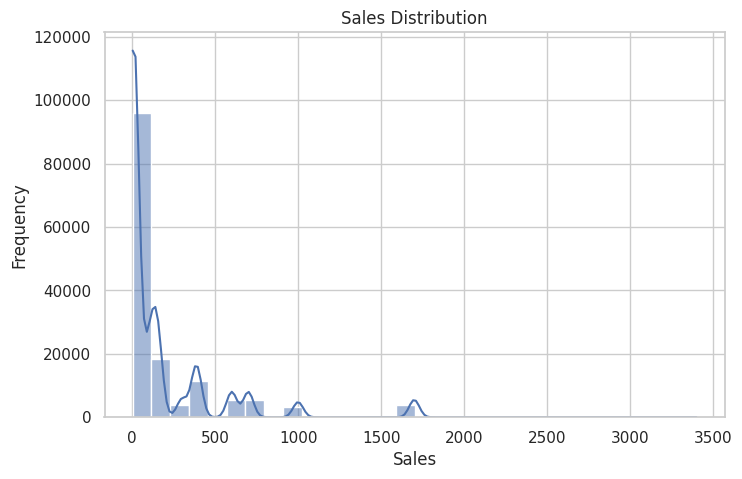

In [9]:
sns.set(style='whitegrid')
# 1. Sales Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()



<ipython-input-10-cfbe4b6b23eb>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Month', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')
<ipython-input-10-cfbe4b6b23eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')


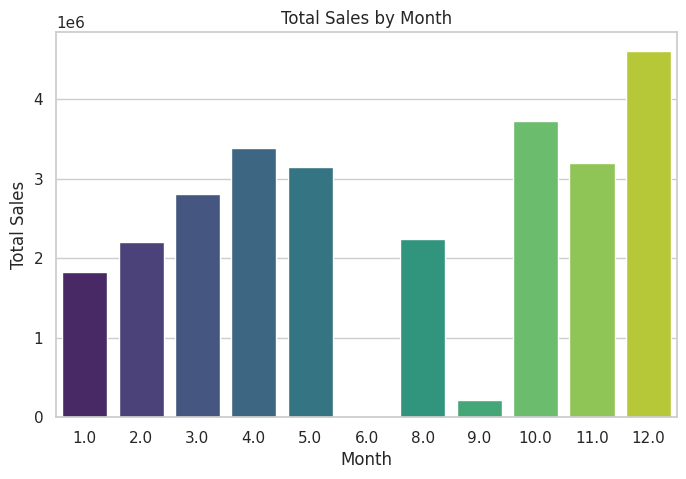

In [10]:
# 2. Sales by Month
plt.figure(figsize=(8, 5))
sns.barplot(x='Month', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


<ipython-input-11-14f871b21cc3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.index, y=city_sales.values, palette='coolwarm')


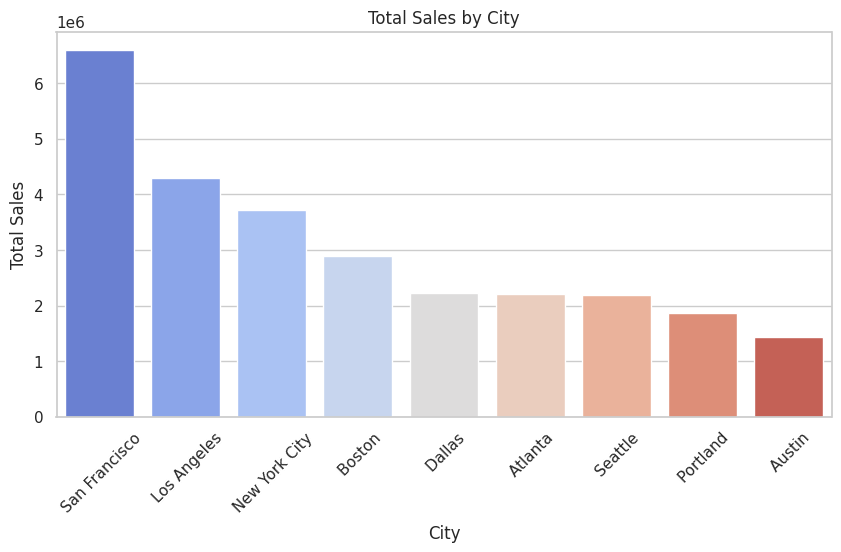

In [11]:
# 3. Sales by City
plt.figure(figsize=(10, 5))
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=city_sales.index, y=city_sales.values, palette='coolwarm')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


<ipython-input-12-5e1ee7c94a83>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette='mako')


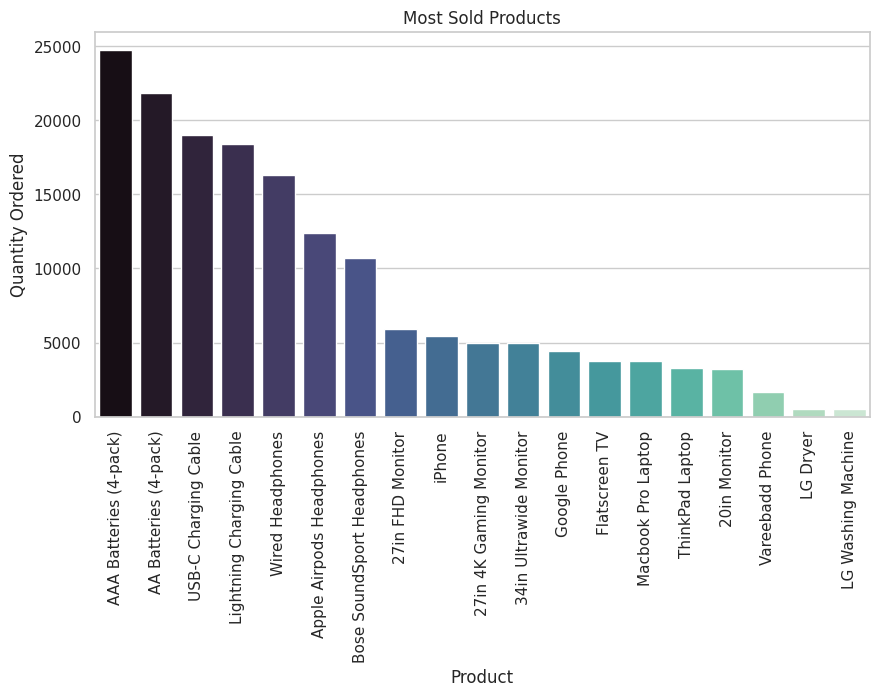

In [12]:
# 4. Most Sold Products
plt.figure(figsize=(10, 5))
product_sales = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
sns.barplot(x=product_sales.index, y=product_sales.values, palette='mako')
plt.title('Most Sold Products')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=90)
plt.show()


<ipython-input-13-93616516eb74>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='Sales', data=df, estimator=sum, ci=None, marker='o')


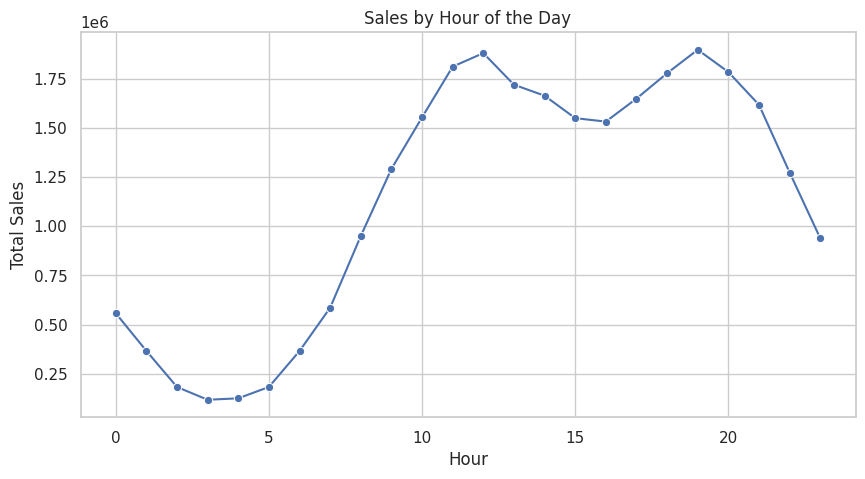

In [13]:
# 5. Sales by Hour
plt.figure(figsize=(10, 5))
sns.lineplot(x='Hour', y='Sales', data=df, estimator=sum, ci=None, marker='o')
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [14]:
monthly_sales = df.groupby('Month')['Sales'].sum().sort_index()
print("Total Sales by Month:")
print(monthly_sales)


Total Sales by Month:
Month
1.0     1822256.73
2.0     2202022.42
3.0     2807100.38
4.0     3390670.24
5.0     3152606.75
6.0        2537.34
8.0     2242315.57
9.0      215773.11
10.0    3733388.52
11.0    3199603.20
12.0    4613443.34
Name: Sales, dtype: float64


In [22]:
max_month = monthly_sales.idxmax() # Changed 'monthly_salebs' to 'monthly_sales'
max_value = monthly_sales.max()

In [23]:
min_month = monthly_sales.idxmin()
min_value = monthly_sales.min()


min_value


2537.34

In [24]:
max_month

np.float64(12.0)

In [25]:
max_value


4613443.34

In [26]:
min_month


np.float64(6.0)

In [27]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Convert categorical to numeric using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Categorical Columns: Index(['Product', 'Order Date', 'Purchase Address', 'City'], dtype='object')


In [28]:
# Drop unnecessary columns
X = df.drop(columns=['Unnamed: 0', 'Order ID', 'Sales', 'Purchase Address', 'Order Date'])

# Target column
y = df['Sales']


In [29]:

y

,Sales
0,1700.00
1,600.00
2,11.95
3,149.99
4,11.95
...,...
147569,300.00
147570,389.99
147571,14.95
147572,700.00


In [30]:
X

,Product,Quantity Ordered,Price Each,Month,City,Hour
0,13,1.0,1700.00,12.0,5,0.0
1,11,1.0,600.00,12.0,5,7.0
2,15,1.0,11.95,12.0,5,18.0
3,2,1.0,149.99,12.0,7,15.0
4,15,1.0,11.95,12.0,0,12.0
...,...,...,...,...,...,...
147569,8,1.0,300.00,9.0,4,19.0
147570,1,1.0,389.99,9.0,7,23.0
147571,12,1.0,14.95,9.0,8,19.0
147572,18,1.0,700.00,9.0,7,14.0


In [31]:


# Split the dataset into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict on the test set
y_pred = model.predict(X_test)


In [34]:

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 84.18034349173311
R² Score: 0.9992443906587659


In [36]:
import pickle

# Replace these with your actual model and scaler variable names
# model = ...
# scaler = ...

# Save model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Commenting out Save scaler, since no scaler is defined.
# with open('scaler.pkl', 'wb') as scaler_file:
#     pickle.dump(scaler, scaler_file)